In [ ]:

# https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [1]:

import sys

command_str = '{sys.executable} -m pip install --upgrade seaborn'.format(sys=sys)
print(command_str)
!{command_str}

C:\Users\577342\AppData\Local\Continuum\anaconda3\python.exe -m pip install --upgrade seaborn
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0


In [1]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../py')

In [2]:

%run ../../load_magic/storage.py
%run ../../load_magic/paths.py
%run ../../load_magic/lists.py
%run ../../load_magic/environment.py
%run ../../load_magic/dataframes.py

import scraping_utils
wikipedia = scraping_utils.wikipedia

from IPython.display import clear_output
from bs4 import BeautifulSoup as bs
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from tqdm import tqdm_notebook as tqdm
from urllib import request
from urllib.parse import unquote
import networkx as nx
import numpy as np
import re
import seaborn as sns; sns.set()
import wikidata

notebook_path = get_notebook_path()
print(notebook_path)
s = Storage()
counties_df = s.load_object('counties_df')
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])

%pprint
dir()

D:\Documents\Repositories\notebooks\covid19\ipynb\Seaborn Heatmap Exploration.ipynb
['s.attempt_to_pickle', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']
Pretty printing has been turned OFF


['Config', 'In', 'Out', 'RandomForestClassifier', 'SequenceMatcher', 'Storage', '_', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__nonzero__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i2', '_ih', '_ii', '_iii', '_oh', 'bs', 'check_4_doubles', 'check_for_typos', 'clear_output', 'conjunctify_list', 'copyfile', 'counties_df', 'csv', 'datetime', 'encoding', 'example_iterrows', 'exit', 'filepath_regex', 'get_classifier', 'get_column_descriptions', 'get_data_structs_dataframe', 'get_datastructure_prediction', 'get_dir_tree', 'get_git_lfs_track_commands', 'get_importances', 'get_input_sample', 'get_ipython', 'get_max_rsquared_adj', 'get_module_version', 'get_notebook_path', 'get_page_tables', 'get_specific_gitignore_files', 'get_struct_name', 'humanize_bytes', 'io', 'ipykernel', 'json', 'jupyter_config_dir', 'math', 'notebook_path', 'notebookapp', 'np', 'nx', 'os', 'pd', 'pearsonr', 'pickle', 'plt', 'preprocess_data', 'print_all_files_ending_start


----


<dd>

Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the `<span class="pre">ax</span>` argument. Part of this Axes space will be taken and used to plot a colormap, unless `<span class="pre">cbar</span>` is False or a separate Axes is provided to `<span class="pre">cbar_ax</span>`.

<dl class="field-list simple">

<dt class="field-odd">Parameters</dt>

<dd class="field-odd">

<dl class="simple">

<dt>**data**<span class="classifier">rectangular dataset</span></dt>

<dd>

2D dataset that can be coerced into an ndarray. If a Pandas DataFrame is provided, the index/column information will be used to label the columns and rows.

</dd>

<dt>**vmin, vmax**<span class="classifier">floats, optional</span></dt>

<dd>

Values to anchor the colormap, otherwise they are inferred from the data and other keyword arguments.

</dd>

<dt>**cmap**<span class="classifier">matplotlib colormap name or object, or list of colors, optional</span></dt>

<dd>

The mapping from data values to color space. If not provided, the default will depend on whether `<span class="pre">center</span>` is set.

</dd>

<dt>**center**<span class="classifier">float, optional</span></dt>

<dd>

The value at which to center the colormap when plotting divergant data. Using this parameter will change the default `<span class="pre">cmap</span>` if none is specified.

</dd>

<dt>**robust**<span class="classifier">bool, optional</span></dt>

<dd>

If True and `<span class="pre">vmin</span>` or `<span class="pre">vmax</span>` are absent, the colormap range is computed with robust quantiles instead of the extreme values.

</dd>

<dt>**annot**<span class="classifier">bool or rectangular dataset, optional</span></dt>

<dd>

If True, write the data value in each cell. If an array-like with the same shape as `<span class="pre">data</span>`, then use this to annotate the heatmap instead of the data. Note that DataFrames will match on position, not index.

</dd>

<dt>**fmt**<span class="classifier">string, optional</span></dt>

<dd>

String formatting code to use when adding annotations.

</dd>

<dt>**annot_kws**<span class="classifier">dict of key, value mappings, optional</span></dt>

<dd>

Keyword arguments for `<span class="pre">ax.text</span>` when `<span class="pre">annot</span>` is True.

</dd>

<dt>**linewidths**<span class="classifier">float, optional</span></dt>

<dd>

Width of the lines that will divide each cell.

</dd>

<dt>**linecolor**<span class="classifier">color, optional</span></dt>

<dd>

Color of the lines that will divide each cell.

</dd>

<dt>**cbar**<span class="classifier">boolean, optional</span></dt>

<dd>

Whether to draw a colorbar.

</dd>

<dt>**cbar_kws**<span class="classifier">dict of key, value mappings, optional</span></dt>

<dd>

Keyword arguments for <cite>fig.colorbar</cite>.

</dd>

<dt>**cbar_ax**<span class="classifier">matplotlib Axes, optional</span></dt>

<dd>

Axes in which to draw the colorbar, otherwise take space from the main Axes.

</dd>

<dt>**square**<span class="classifier">boolean, optional</span></dt>

<dd>

If True, set the Axes aspect to “equal” so each cell will be square-shaped.

</dd>

<dt>**xticklabels, yticklabels**<span class="classifier">“auto”, bool, list-like, or int, optional</span></dt>

<dd>

If True, plot the column names of the dataframe. If False, don’t plot the column names. If list-like, plot these alternate labels as the xticklabels. If an integer, use the column names but plot only every n label. If “auto”, try to densely plot non-overlapping labels.

</dd>

<dt>**mask**<span class="classifier">boolean array or DataFrame, optional</span></dt>

<dd>

If passed, data will not be shown in cells where `<span class="pre">mask</span>` is True. Cells with missing values are automatically masked.

</dd>

<dt>**ax**<span class="classifier">matplotlib Axes, optional</span></dt>

<dd>

Axes in which to draw the plot, otherwise use the currently-active Axes.

</dd>

<dt>**kwargs**<span class="classifier">other keyword arguments</span></dt>

<dd>

All other keyword arguments are passed to `<span class="pre">matplotlib.axes.Axes.pcolormesh()</span>`.

</dd>

</dl>

</dd>

<dt class="field-even">Returns</dt>

<dd class="field-even">

<dl class="simple">

<dt>**ax**<span class="classifier">matplotlib Axes</span></dt>

<dd>

Axes object with the heatmap.

</dd>

</dl>

</dd>

</dl>


See also

<dl class="simple">

<dt>[`<span class="pre">clustermap</span>`](seaborn.clustermap.html#seaborn.clustermap "seaborn.clustermap")</dt>

<dd>

Plot a matrix using hierachical clustering to arrange the rows and columns.

</dd>

</dl>


# 2 Explanation of different measures

[Picture would be nice]

**Example 2.1.** Consider three countries, each with 100,000 people and an area of $100km^2$, and think about the population of each square kilometre grid square.

1.  *Averagia*  has  a  uniform  spread  of  population,  with  1,000  people  living  in  each  gridsquare.
2.  *Builtupia*  has  ten  towns,  each  of  10,000  people  living  in  a  single  square  kilometre, and the remaining land is uninhabited.
3.  *Citia* has one city, where 100,000 people live in a single square kilometre, and where the remaining land is uninhabited.


Examples

Plot a heatmap for a numpy array:


## Heatmap on a 10x10 grid?

In [5]:

total_pop = 100_000

averagia_people_count = 1_000
builtupia_people_count = 10_000
citia_people_count = 100_000

averagia_town_count = 0
builtupia_town_count = 10
citia_town_count = 1

gridsquare_count = total_pop/averagia_people_count
side_length = int(np.sqrt(gridsquare_count))

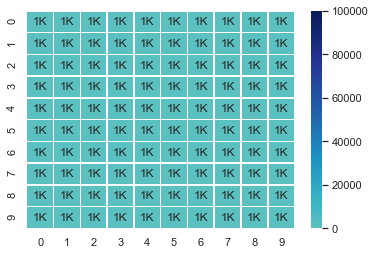

In [77]:

# Averagia has a uniform spread of population, with 1,000 people living in each gridsquare.
averagia_data = np.empty([side_length, side_length], dtype=int)
averagia_data.fill(averagia_people_count)
averagia_annot_array = np.array(['{}K'.format(int(d/averagia_people_count)) for d in averagia_data.flat]).reshape(averagia_data.shape)
ax = sns.heatmap(averagia_data, vmin=0, vmax=citia_people_count, center=builtupia_people_count, annot=averagia_annot_array, fmt='s',
                 linewidths=.5, cmap='YlGnBu')

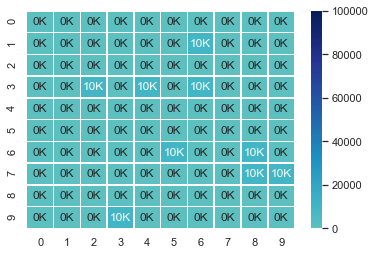

In [78]:

# Builtupia has ten towns, each of 10,000 people living in a single square kilometre, and the remaining land is uninhabited.
builtupia_data = np.empty([side_length, side_length], dtype=int)
builtupia_data.fill(0)
for x, y in zip(np.random.choice(side_length, builtupia_town_count), np.random.choice(side_length, builtupia_town_count)):
    builtupia_data[x, y] = builtupia_people_count
builtupia_annot_array = np.array(['{}K'.format(int(d/averagia_people_count)) for d in builtupia_data.flat]).reshape(averagia_data.shape)
ax = sns.heatmap(builtupia_data, vmin=0, vmax=citia_people_count, center=builtupia_people_count, annot=builtupia_annot_array, fmt='s',
                 linewidths=.5, cmap='YlGnBu')

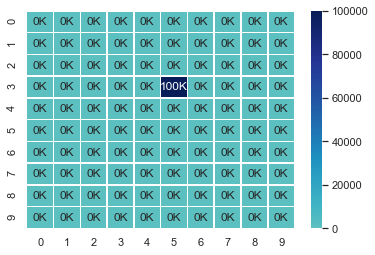

In [79]:

# Citia has one city, where 100,000 people live in a single square kilometre, and where the remaining land is uninhabited.
citia_data = np.empty([side_length, side_length], dtype=int)
citia_data.fill(0)
for x, y in zip(np.random.choice(side_length, citia_town_count), np.random.choice(side_length, citia_town_count)):
    citia_data[x, y] = citia_people_count
citia_annot_array = np.array(['{}K'.format(int(d/averagia_people_count)) for d in citia_data.flat]).reshape(averagia_data.shape)
ax = sns.heatmap(citia_data, vmin=0, vmax=citia_people_count, center=builtupia_people_count, annot=citia_annot_array, fmt='s',
                 linewidths=.5, cmap='YlGnBu')

In [92]:

averagia_data = np.rot90(s.load_object('averagia_data'))
averagia_annot_array = np.array(['{}K'.format(int(d/averagia_people_count)) for d in averagia_data.flat]).reshape(averagia_data.shape)
builtupia_data = np.rot90(s.load_object('builtupia_data'))
builtupia_annot_array = np.array(['{}K'.format(int(d/averagia_people_count)) for d in builtupia_data.flat]).reshape(averagia_data.shape)
citia_data = np.rot90(s.load_object('citia_data'))
citia_annot_array = np.array(['{}K'.format(int(d/averagia_people_count)) for d in citia_data.flat]).reshape(averagia_data.shape)

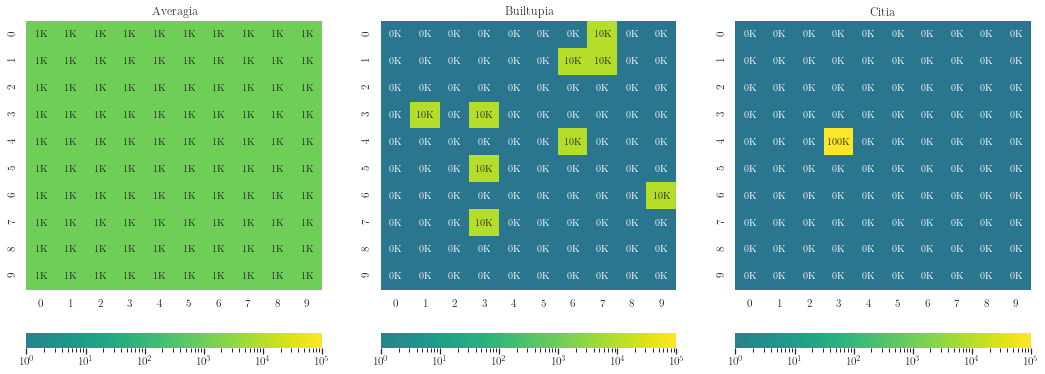

In [137]:

%matplotlib inline
from matplotlib.text import Text
from matplotlib.colors import LogNorm, BoundaryNorm
import copy

# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Creates four polar axes, and accesses them through the
# returned array
fig = plt.figure(figsize=(18, 18/3))
row_count = 2
column_count = 3
grid_kws = {'height_ratios': (.9, .05), 'hspace': .3}
axes = fig.subplots(row_count, column_count, gridspec_kw=grid_kws)
tuple_list = [(averagia_data, averagia_annot_array, 'Averagia'),
              (builtupia_data, builtupia_annot_array, 'Builtupia'),
              (citia_data, citia_annot_array, 'Citia')]
row = 0
cbar_kws = {'orientation': 'horizontal'}
cmap = copy.copy(matplotlib.cm.get_cmap('viridis'))
cmap.set_bad(cmap(100)[:-1])
#norm = LogNorm(vmin=0, vmax=total_pop, clip=False)
#norm = BoundaryNorm(boundaries=[0, total_pop], ncolors=3)
norm = LogNorm(vmin=1, vmax=total_pop, clip=False)
for col, data_tuple in enumerate(tuple_list):
    data = data_tuple[0]
    annot_array = data_tuple[1]
    title = data_tuple[2]
    ax = axes[row, col]
    cbar_ax = axes[row+1, col]
    ax = sns.heatmap(data, vmin=1, vmax=citia_people_count, center=builtupia_people_count, annot=annot_array,
                     fmt='s', linewidths=lw, cmap=cmap, ax=ax, cbar_ax=cbar_ax, cbar_kws=cbar_kws, norm=norm)
    #ticklabels_list = [Text(x=Text_obj.get_position()[0], y=Text_obj.get_position()[1],
    #                       text='${:,}$'.format(int(Text_obj.get_text().split('$')[1]))) for Text_obj in cbar_ax.xaxis.get_ticklabels()]
    #ticklabels_list = cbar_ax.xaxis.set_ticklabels(ticklabels_list)
    Text_tuple = ax.set_title(title)

In [134]:

cmap(1)[:-1]

(0.26851, 0.009605, 0.335427)

In [132]:

print(['cmap.{}'.format(fn) for fn in dir(cmap) if not fn.startswith('_')])

['cmap.N', 'cmap.colorbar_extend', 'cmap.colors', 'cmap.is_gray', 'cmap.monochrome', 'cmap.name', 'cmap.reversed', 'cmap.set_bad', 'cmap.set_over', 'cmap.set_under']


In [129]:

LogNorm.process_value?

Signature: LogNorm.process_value(value)
Docstring:
Homogenize the input *value* for easy and efficient normalization.

*value* can be a scalar or sequence.

Returns *result*, *is_scalar*, where *result* is a
masked array matching *value*.  Float dtypes are preserved;
integer types with two bytes or smaller are converted to
np.float32, and larger types are converted to np.float64.
Preserving float32 when possible, and using in-place operations,
can greatly improve speed for large arrays.

Experimental; we may want to add an option to force the
use of float32.
File:      c:\users\577342\appdata\local\continuum\anaconda3\lib\site-packages\matplotlib\colors.py
Type:      function


In [122]:

cmap.colors

[[0.267004, 0.004874, 0.329415], [0.26851, 0.009605, 0.335427], [0.269944, 0.014625, 0.341379], [0.271305, 0.019942, 0.347269], [0.272594, 0.025563, 0.353093], [0.273809, 0.031497, 0.358853], [0.274952, 0.037752, 0.364543], [0.276022, 0.044167, 0.370164], [0.277018, 0.050344, 0.375715], [0.277941, 0.056324, 0.381191], [0.278791, 0.062145, 0.386592], [0.279566, 0.067836, 0.391917], [0.280267, 0.073417, 0.397163], [0.280894, 0.078907, 0.402329], [0.281446, 0.08432, 0.407414], [0.281924, 0.089666, 0.412415], [0.282327, 0.094955, 0.417331], [0.282656, 0.100196, 0.42216], [0.28291, 0.105393, 0.426902], [0.283091, 0.110553, 0.431554], [0.283197, 0.11568, 0.436115], [0.283229, 0.120777, 0.440584], [0.283187, 0.125848, 0.44496], [0.283072, 0.130895, 0.449241], [0.282884, 0.13592, 0.453427], [0.282623, 0.140926, 0.457517], [0.28229, 0.145912, 0.46151], [0.281887, 0.150881, 0.465405], [0.281412, 0.155834, 0.469201], [0.280868, 0.160771, 0.472899], [0.280255, 0.165693, 0.476498], [0.279574, 0.170

In [84]:

s.store_objects(averagia_data=averagia_data, averagia_annot_array=averagia_annot_array, builtupia_data=builtupia_data,
                builtupia_annot_array=builtupia_annot_array, citia_data=citia_data, citia_annot_array=citia_annot_array)

Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\averagia_data.pickle
Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\averagia_annot_array.pickle
Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\builtupia_data.pickle
Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\builtupia_annot_array.pickle
Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\citia_data.pickle
Pickling to D:\Documents\Repositories\notebooks\covid19\saves\pickle\citia_annot_array.pickle


In [7]:

import matplotlib

matplotlib.use('pgf')
matplotlib.rcParams.update({
    'pgf.texsystem': 'pdflatex',
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

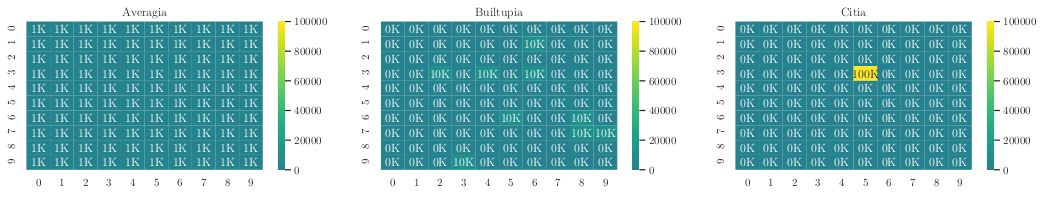

In [73]:

from matplotlib.ticker import FormatStrFormatter, FuncFormatter
from mpl_toolkits import mplot3d

# Setup the figure and axes
fig = plt.figure(figsize=(18, 18/3))
averagia_hm_ax = fig.add_subplot(231)
builtupia_hm_ax = fig.add_subplot(232)
citia_hm_ax = fig.add_subplot(233)

cmap = 'viridis'
lw = 0.0
ax = sns.heatmap(averagia_data, vmin=0, vmax=citia_people_count, center=builtupia_people_count, annot=averagia_annot_array,
                 fmt='s', linewidths=lw, cmap=cmap, ax=averagia_hm_ax)
Text_tuple = averagia_hm_ax.set_title('Averagia')
ax = sns.heatmap(builtupia_data, vmin=0, vmax=citia_people_count, center=builtupia_people_count, annot=builtupia_annot_array,
                 fmt='s', linewidths=lw, cmap=cmap, ax=builtupia_hm_ax)
Text_tuple = builtupia_hm_ax.set_title('Builtupia')
ax = sns.heatmap(citia_data, vmin=0, vmax=citia_people_count, center=builtupia_people_count, annot=citia_annot_array,
                 fmt='s', linewidths=lw, cmap=cmap, ax=citia_hm_ax)
Text_tuple = citia_hm_ax.set_title('Citia')
pgf_dir = os.path.join(s.saves_folder, 'pgf')
os.makedirs(name=pgf_dir, exist_ok=True)
fig.savefig(os.path.join(pgf_dir, 'example_2_1_heat_map.pgf'))

In [69]:

print(['ax.{}'.format(fn) for fn in dir(ax) if 'bar' in fn.lower()])
print(['fig.{}'.format(fn) for fn in dir(fig) if 'bar' in fn.lower()])
print(['plt.{}'.format(fn) for fn in dir(plt) if 'bar' in fn.lower()])

['ax.bar', 'ax.barbs', 'ax.barh', 'ax.broken_barh', 'ax.errorbar']
['fig.colorbar']
['plt.bar', 'plt.barbs', 'plt.barh', 'plt.broken_barh', 'plt.colorbar', 'plt.errorbar']



Change the limits of the colormap:

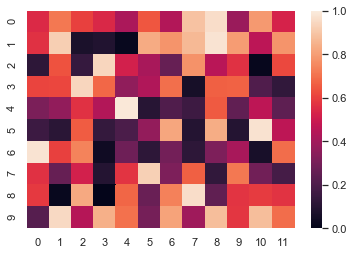

In [17]:

ax = sns.heatmap(uniform_data, vmin=0, vmax=1)


Plot a heatmap for data centered on 0 with a diverging colormap:

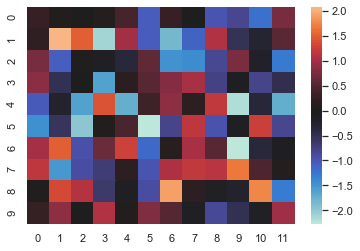

In [22]:

normal_data = np.random.randn(10, 12)
ax = sns.heatmap(normal_data, center=0)


Plot a dataframe with meaningful row and column labels:

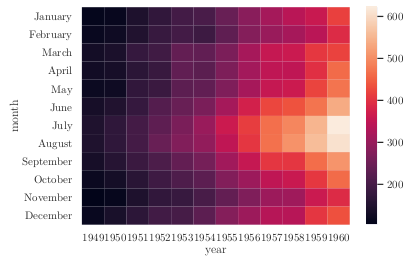

In [12]:

flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights)


Annotate each cell with the numeric value using integer formatting:

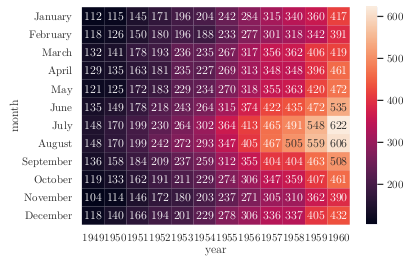

In [13]:

ax = sns.heatmap(flights, annot=True, fmt="d")


Add lines between each cell:

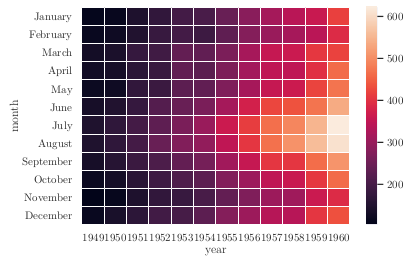

In [14]:

ax = sns.heatmap(flights, linewidths=.5)


Use a different colormap:

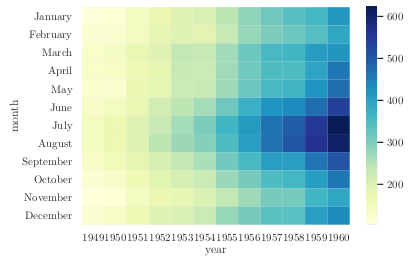

In [15]:

ax = sns.heatmap(flights, cmap='YlGnBu')


Center the colormap at a specific value:

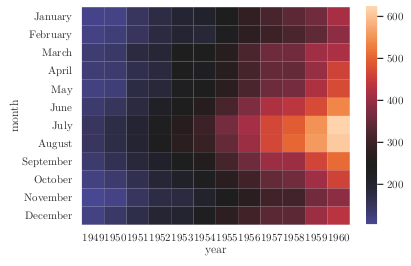

In [16]:

ax = sns.heatmap(flights, center=flights.loc["January", 1955])


Plot every other column label and don’t plot row labels:

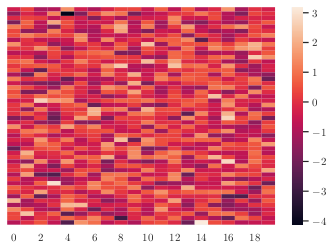

In [17]:

data = np.random.randn(50, 20)
ax = sns.heatmap(data, xticklabels=2, yticklabels=False)


Don’t draw a colorbar:

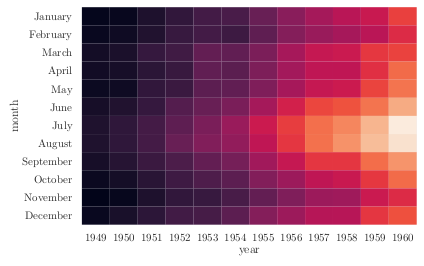

In [18]:

ax = sns.heatmap(flights, cbar=False)


Use different axes for the colorbar:

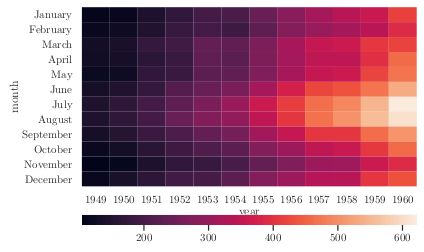

In [19]:

grid_kws = {"height_ratios": (.9, .05), "hspace": .3}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(flights, ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"})


Use a mask to plot only part of a matrix

In [ ]:

corr = np.corrcoef(np.random.randn(10, 200))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True)


----

In [396]:

import pyperclip

pyperclip.copy(str(tuple((v, k) for k, v in idx_dict.items())))